In [1]:
import tensorflow as tf
import keras
import matplotlib as plt
import numpy as np

Using TensorFlow backend.


In [2]:
from keras.applications.inception_v3 import InceptionV3, decode_predictions
from keras import backend as K

In [3]:
iv3 = InceptionV3()

In [4]:
from keras.preprocessing import image
x = image.img_to_array(image.load_img('./resources/toucan.jpg', target_size = (299,299)))

x /= 255
x -= 0.5
x *= 2

In [13]:
x = x.reshape(1, x.shape[0], x.shape[1], x.shape[2])
y = iv3.predict(x)

In [15]:
decode_predictions(y)

40960/35363 [==================================] - 0s 0us/step


[[('n01843383', 'toucan', 0.97309756),
  ('n04146614', 'school_bus', 0.0009443523),
  ('n01829413', 'hornbill', 0.00045698395),
  ('n07892512', 'red_wine', 0.00017493567),
  ('n02607072', 'anemone_fish', 0.00017389708)]]

In [19]:
inp = iv3.layers[0].input
out = iv3.layers[-1].output

In [38]:
target = 779 #Schoolbus

loss = out[0, target]

grad = K.gradients(loss, inp)[0]

In [43]:
optimize = K.function([inp, K.learning_phase()], [grad, loss])

adv = np.copy(x)

cos = 0.0

while cos < 0.97:
    
    gr, cos = optimize([adv, 0]) # 0 Fase de entrenamiento
    
    adv +=  gr
    
    adv = np.clip(adv, -1, 1)
    
    print('Cost:', cos)

Cost: 0.0009443523
Cost: 0.0009597068
Cost: 0.00097468426
Cost: 0.0009897616
Cost: 0.0010046752
Cost: 0.0010206068
Cost: 0.0010370946
Cost: 0.0010541609
Cost: 0.0010721205
Cost: 0.0010909785
Cost: 0.0011100828
Cost: 0.0011293127
Cost: 0.0011490918
Cost: 0.0011700043
Cost: 0.0011914629
Cost: 0.001213802
Cost: 0.0012363222
Cost: 0.0012595719
Cost: 0.0012836705
Cost: 0.0013086724
Cost: 0.0013347223
Cost: 0.001361801
Cost: 0.0013891684
Cost: 0.0014169657
Cost: 0.001445896
Cost: 0.0014757072
Cost: 0.0015066662
Cost: 0.0015387465
Cost: 0.0015713222
Cost: 0.0016043212
Cost: 0.0016369432
Cost: 0.0016698268
Cost: 0.0017035485
Cost: 0.0017379884
Cost: 0.0017734548
Cost: 0.0018120361
Cost: 0.0018511025
Cost: 0.0018918575
Cost: 0.0019361452
Cost: 0.0019821716
Cost: 0.0020311761
Cost: 0.0020818731
Cost: 0.002133695
Cost: 0.00218787
Cost: 0.0022434227
Cost: 0.0023011977
Cost: 0.0023611702
Cost: 0.0024223065
Cost: 0.0024846168
Cost: 0.002549477
Cost: 0.00261786
Cost: 0.0026881755
Cost: 0.0027602552
C

In [44]:
adv /= 2
adv += 0.5
adv *= 255

import matplotlib.pyplot as plt


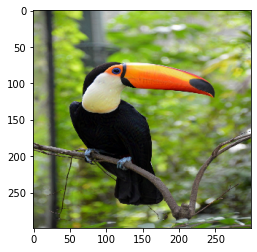

In [45]:
plt.imshow(adv[0].astype(np.uint8))

In [48]:
test = np.copy(adv)
test /= 255
test -= 0.5
test *= 2
y2 = iv3.predict(test)
decode_predictions(y2)

[[('n04146614', 'school_bus', 0.9968334),
  ('n01843383', 'toucan', 0.0018088531),
  ('n01829413', 'hornbill', 0.00088059326),
  ('n02704792', 'amphibian', 1.0150578e-05),
  ('n02930766', 'cab', 8.926429e-06)]]

In [54]:
target2 = 779

loss2 = out[0, target2]

grad2 = K.gradients(loss2, inp)[0]

optimize2 = K.function([inp, K.learning_phase()], [grad2, loss2])

adv2 = np.copy(x)

cost2 = 0.0

pert = 0.01
max_pert = x + pert
min_pert = x - pert


while cost2 < 0.95:
    
    gr, cost2 = optimize2([adv2, 0])
    adv2 += gr
    
    adv2 = np.clip(adv2, min_pert, max_pert)
    adv2 = np.clip(adv2, -1, 1)
    
    print('Cost:', cost2)
    

Cost: 0.0009443523
Cost: 0.0009597064
Cost: 0.00097468426
Cost: 0.000989763
Cost: 0.0010046739
Cost: 0.0010206058
Cost: 0.0010370952
Cost: 0.0010541595
Cost: 0.0010721282
Cost: 0.0010909666
Cost: 0.0011100384
Cost: 0.0011292435
Cost: 0.0011490464
Cost: 0.0011698889
Cost: 0.0011913199
Cost: 0.0012136308
Cost: 0.0012361614
Cost: 0.0012593982
Cost: 0.0012835908
Cost: 0.0013087225
Cost: 0.0013347962
Cost: 0.0013618444
Cost: 0.0013892422
Cost: 0.0014170143
Cost: 0.0014459539
Cost: 0.0014758621
Cost: 0.0015067877
Cost: 0.0015388782
Cost: 0.0015715603
Cost: 0.00160432
Cost: 0.0016370341
Cost: 0.0016698525
Cost: 0.0017032886
Cost: 0.0017373662
Cost: 0.001772415
Cost: 0.001810413
Cost: 0.0018486193
Cost: 0.0018889406
Cost: 0.0019316442
Cost: 0.0019769217
Cost: 0.0020247097
Cost: 0.0020745662
Cost: 0.0021254034
Cost: 0.0021784399
Cost: 0.0022340436
Cost: 0.0022923383
Cost: 0.0023509453
Cost: 0.0024113553
Cost: 0.0024732547
Cost: 0.0025379295
Cost: 0.002606385
Cost: 0.002676802
Cost: 0.002749037


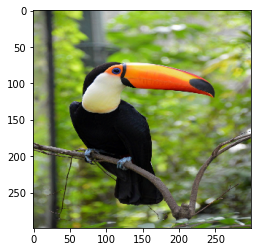

In [66]:
test2 = np.copy(adv2)

test2 /= 2
test2 += 0.5
test2 *= 255

plt.imshow(test2[0].astype(np.uint8))

test2 /= 255
test2 -= 0.5
test2 *= 2

y3 = iv3.predict(test2)

In [67]:
decode_predictions(y3)

[[('n04146614', 'school_bus', 0.9824185),
  ('n01843383', 'toucan', 0.009800827),
  ('n01829413', 'hornbill', 0.004575893),
  ('n02951358', 'canoe', 5.828924e-05),
  ('n04465501', 'tractor', 4.786947e-05)]]